# Data Prep

Paper can be found here: [https://www.gperezs.com/papers/bppa.pdf](https://www.gperezs.com/papers/bppa.pdf) and their CVPR 2019 workshop publication can be found here [https://biomedicalcomputervision.uniandes.edu.co/publications/finding-four-leaf-clovers-a-benchmark-for-fine-grained-object-localization/](https://biomedicalcomputervision.uniandes.edu.co/publications/finding-four-leaf-clovers-a-benchmark-for-fine-grained-object-localization/)

Given over 100,000 images and many types of annotations, instane, semantic etc... how do we get this ready for use?   
Here is a file tree of the [FLC data](https://drive.google.com/file/d/1fq6ZeVg2-CjRtKgcBcnKy9jLfUIabfe8/view?usp=sharing)   
```
FLC2019 % tree -C -r -I '*.jpg|*.png|*.mat'   
.
├── trainval
│   ├── coco_annotations
│   │   ├── leaves_trainval_pos.json
│   │   ├── leaves_trainval_negs.json
│   │   ├── instances_trainval_pos.json
│   │   ├── instances_trainval_negs.json
│   │   └── instances_trainval_hard_pos.json
│   ├── SegmentationClass
│   ├── JPEGImages_pos
│   ├── JPEGImages
│   └── BorderClass
├── test
│   ├── gt_mats_pos
│   ├── gt_mats
│   │   └── gt_mats_pos
│   ├── coco_annotations
│   │   ├── leaves_test_pos.json
│   │   ├── leaves_test_negs.json
│   │   ├── instances_test_pos.json
│   │   ├── instances_test_negs.json
│   │   ├── instances_test_hard_pos.json
│   │   └── instances_test_all.json
│   ├── SegmentationClass
│   ├── JPEGImages_pos
│   ├── JPEGImages_neg
│   ├── JPEGImages
│   ├── BorderClass_pos
│   ├── BorderClass_alejo
│   └── BorderClass
│       └── BorderClass_pos
└── create_contours.py

```   

As far as data we will be using, we will not be using the .mat files or the BorderClass files.   
Here is some more information:   
* In the **trainval**/JPEGImages_pos dir, we have 1000 jpg files totalling 1.63GB. These are images *with* four-leaf clovers   
* In the **trainval**/JPEGImages dir, we have 52,638 jpg files totalling 23.8GB. These are images *without* four-leaf clovers as well as the same 1000 images *with* four-leaf clovers   
  
-----

*   In the **test**/JPEGImages_pos dir, we have 500 jpg files totalling 888.8MB. These are images *with* four-leaf clovers  
*   In the **test**/JPEGImages_neg dir, we have 51,671 jpg files totalling 22.2GB. These are images *without* four-leaf clovers  
*   Additionally, we have the  **test**/JPEGImages dir which combines both the pos and neg images into a single dir   
  
-----   
   
According to their paper:

| General statistics         | Trainval set | Test set |
|----------------------------|--------------|----------|
| Total positive images      | 1,000        | 500      |
| Total negative images      | 51,637       | 51,670   |
| Total images               | 52,637       | 52,170   |
| 4-leaf clover instances    | 1,412        | 739      |
| 4-leaf clover leaves       | 5,858        | 3,094    |
| 4-leaf clover pixels       | 0.0445%      | 0.0588%  |
| 4-leaf clover boundary pxls| 0.0026%      | 0.0030%  |

Both the trainval and test dirs include a coco_annotations dir, I will be using the *instances_trainval_hard_pos.json* and *instances_test_hard_pos.json* - This is for the sake of my limitation of training time and compute resources. These are standard coco bbox and segmentation annotations for the pos images. They include both three-leaf clovers and four-leaf clovers annotated in all 1500 trainval/test images.

### What results are we trying to replicate?   

Object Detection:   
### What results are we trying to replicate?   

Object Detection:   

| Dataset         | Method                | mAP@.5(%) | mAP@[.5, .95] (%) all | mAP@[.5, .95] (%) small | mAP@[.5, .95] (%) medium | mAP@[.5, .95] (%) large |
|-----------------|-----------------------|-----------|-----------------------|-------------------------|--------------------------|-------------------------|
| FLC test (Pos. only) | Mask R-CNN ResNet50+FPN | 44.9      | 36.4                  | 0.0                     | 24.5                     | 36.7                    |
| FLC test        | Mask R-CNN ResNet50+FPN | 9.50      | 7.90                  | 0.0                     | 0.10                     | 10.7                    |

 
Instance Segmentation:   
| Dataset  | Method       | mAP@[.5,.95](%) |
|----------|--------------|-----------------|
| FLC(Pos.)| MaskR-CNN R50| 35.0            |
| FLC      | MaskR-CNN R50| 8.0             |   

Semantic Segmentation:     
| Dataset | Method | mIoU (%) |
|---------|--------|----------|
| FLC (Positives) | MaskR-CNN R50 | 32.71|
| FLC | MaskR-CNN R50 | 7.71 |

### Let's get some basic vars out of the way

Requires:   
torch   
pycocotools   for coco annotations
cv2 for loading images

In [1]:
# image dirs
trainval_pos_img_dir = '/Users/mattsloan/Downloads/FLC2019/trainval/JPEGImages_pos'
test_pos_img_dir = '/Users/mattsloan/Downloads/FLC2019/test/JPEGImages_pos'

# coco annotation files
trainval_hard_ann = '/Users/mattsloan/Downloads/FLC2019/trainval/coco_annotations/instances_trainval_hard_pos.json'
test_hard_ann = '/Users/mattsloan/Downloads/FLC2019/test/coco_annotations/instances_test_hard_pos.json'

In [2]:
from utils import flc_dataset
debug = True
train_dataset = flc_dataset.FLCDataset(root_dir=trainval_pos_img_dir, annotation_file=trainval_hard_ann, debug=debug)

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


In [3]:
len(train_dataset)

1000

idx: 0 | image_data: {'id': 1, 'file_name': '1_000001.jpg', 'width': 4128, 'height': 2322, 'date_captured': '2019-03-07 13:41:52.354314', 'license': 1, 'coco_url': '', 'flickr_url': ''}
anns: [{'id': 1, 'image_id': 1, 'category_id': 1, 'iscrowd': 0, 'area': 19187, 'bbox': [1915.0, 1103.0, 199.0, 183.0], 'segmentation': [[2019.0, 1285.5, 2001.0, 1285.5, 1977.0, 1278.5, 1969.0, 1273.5, 1958.5, 1260.0, 1959.5, 1256.0, 1969.0, 1249.5, 1998.0, 1244.5, 2010.0, 1238.5, 2012.5, 1231.0, 2004.0, 1228.5, 1999.0, 1240.5, 1983.0, 1245.5, 1968.0, 1246.5, 1959.0, 1243.5, 1941.5, 1228.0, 1919.5, 1191.0, 1914.5, 1176.0, 1916.5, 1167.0, 1934.0, 1148.5, 1969.0, 1149.5, 1986.0, 1160.5, 1989.5, 1132.0, 2005.5, 1106.0, 2014.0, 1102.5, 2025.0, 1109.5, 2034.0, 1110.5, 2043.5, 1124.0, 2055.5, 1169.0, 2056.0, 1190.5, 2069.0, 1183.5, 2085.0, 1180.5, 2104.0, 1181.5, 2113.5, 1190.0, 2113.5, 1200.0, 2087.0, 1221.5, 2073.0, 1226.5, 2073.5, 1232.0, 2050.5, 1260.0, 2019.0, 1285.5], [1987.5, 1175.0, 1987.0, 1165.5, 198

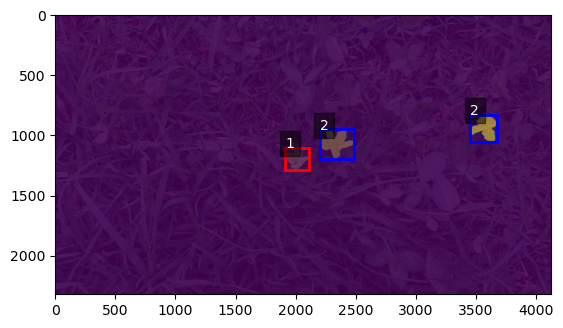

1

In [4]:
train_dataset[0]

idx: 1 | image_data: {'id': 2, 'file_name': '1_000002.jpg', 'width': 4128, 'height': 2322, 'date_captured': '2019-03-07 13:41:52.354314', 'license': 1, 'coco_url': '', 'flickr_url': ''}
anns: [{'id': 2, 'image_id': 2, 'category_id': 1, 'iscrowd': 0, 'area': 14896, 'bbox': [1477.0, 32.0, 137.0, 142.0], 'segmentation': [[1593.0, 173.5, 1557.0, 173.5, 1545.0, 168.5, 1525.0, 171.5, 1512.5, 164.0, 1502.5, 137.0, 1503.5, 113.0, 1495.5, 102.0, 1491.5, 87.0, 1481.5, 74.0, 1476.5, 58.0, 1476.5, 46.0, 1484.0, 36.5, 1499.0, 31.5, 1514.0, 33.5, 1525.5, 42.0, 1530.0, 57.5, 1540.0, 40.5, 1555.0, 33.5, 1579.0, 33.5, 1592.0, 40.5, 1601.5, 50.0, 1608.5, 64.0, 1608.5, 83.0, 1599.5, 102.0, 1591.5, 101.0, 1607.5, 123.0, 1613.5, 148.0, 1604.5, 170.0, 1593.0, 173.5], [1529.5, 65.0, 1529.0, 60.5, 1529.5, 65.0], [1534.5, 112.0, 1537.5, 101.0, 1531.0, 95.5, 1528.5, 104.0, 1534.5, 112.0], [1536.5, 117.0, 1535.0, 114.5, 1536.5, 117.0], [1538.5, 120.0, 1536.5, 119.0, 1538.5, 120.0], [1541.5, 125.0, 1539.0, 121.5,

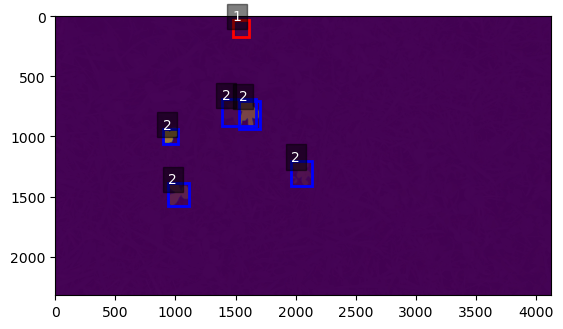

1

In [5]:
train_dataset[1]

idx: 2 | image_data: {'id': 3, 'file_name': '1_000003.jpg', 'width': 4128, 'height': 2322, 'date_captured': '2019-03-07 13:41:52.354314', 'license': 1, 'coco_url': '', 'flickr_url': ''}
anns: [{'id': 3, 'image_id': 3, 'category_id': 1, 'iscrowd': 0, 'area': 48623, 'bbox': [905.0, 594.0, 250.0, 256.0], 'segmentation': [[1113.0, 849.5, 1086.0, 846.5, 1053.0, 826.5, 1038.0, 812.5, 1032.0, 824.5, 1014.0, 832.5, 982.0, 833.5, 972.0, 831.5, 966.5, 827.0, 953.5, 806.0, 945.5, 770.0, 947.5, 740.0, 955.5, 722.0, 963.5, 714.0, 954.0, 721.5, 938.0, 716.5, 924.5, 693.0, 908.5, 677.0, 910.5, 662.0, 904.5, 647.0, 905.5, 629.0, 912.5, 610.0, 921.0, 601.5, 942.0, 593.5, 965.0, 593.5, 982.0, 597.5, 999.5, 610.0, 1014.0, 635.5, 1025.5, 617.0, 1041.0, 604.5, 1069.0, 599.5, 1106.0, 602.5, 1141.5, 627.0, 1151.5, 650.0, 1150.5, 695.0, 1143.5, 709.0, 1133.0, 719.5, 1120.5, 725.0, 1135.5, 742.0, 1144.5, 758.0, 1153.5, 786.0, 1154.5, 803.0, 1151.5, 817.0, 1142.5, 830.0, 1126.0, 844.5, 1113.0, 849.5], [1052.5, 

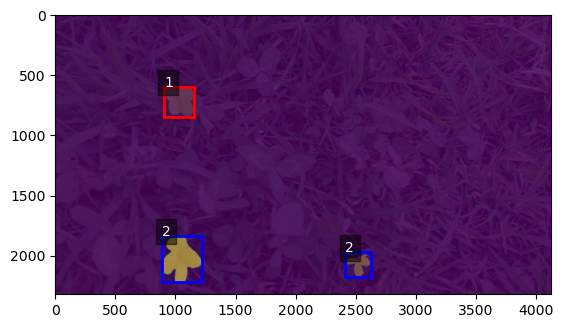

1

In [6]:
train_dataset[2]

idx: 3 | image_data: {'id': 4, 'file_name': '1_000004.jpg', 'width': 4128, 'height': 2322, 'date_captured': '2019-03-07 13:41:52.354314', 'license': 1, 'coco_url': '', 'flickr_url': ''}
anns: [{'id': 4, 'image_id': 4, 'category_id': 1, 'iscrowd': 0, 'area': 37182, 'bbox': [2479.0, 664.0, 220.0, 278.0], 'segmentation': [[2649.0, 941.5, 2629.0, 941.5, 2607.0, 933.5, 2580.0, 917.5, 2578.0, 912.5, 2553.0, 924.5, 2532.0, 927.5, 2513.5, 907.0, 2506.5, 884.0, 2509.5, 848.0, 2527.0, 827.5, 2548.5, 815.0, 2519.0, 802.5, 2507.5, 789.0, 2492.5, 762.0, 2478.5, 694.0, 2485.0, 666.5, 2492.0, 663.5, 2519.0, 665.5, 2553.0, 679.5, 2575.0, 695.5, 2590.5, 714.0, 2598.5, 734.0, 2598.5, 740.0, 2586.0, 754.5, 2600.0, 739.5, 2610.0, 738.5, 2656.0, 711.5, 2678.0, 703.5, 2686.0, 703.5, 2690.5, 709.0, 2698.5, 745.0, 2676.5, 794.0, 2663.0, 809.5, 2652.0, 815.5, 2623.0, 819.5, 2581.0, 820.5, 2572.0, 814.5, 2569.5, 816.0, 2580.0, 826.5, 2593.0, 824.5, 2619.0, 833.5, 2655.5, 869.0, 2667.5, 905.0, 2667.5, 923.0, 264

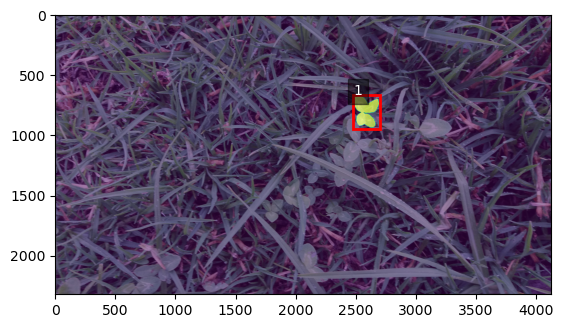

1

In [7]:
train_dataset[3]